In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


In [4]:
df.drop(axis = 1, columns='Id', inplace= True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It can be observed that blood pressure, skin thickness and BMI have minimum values as zero which shouldn't be. The blood pressure, skin thickness, glucose level, insulin and BMI of an individual caanot be zero. So, proceed to replace zeroes with an appropriate value - median or mode.

# Plots

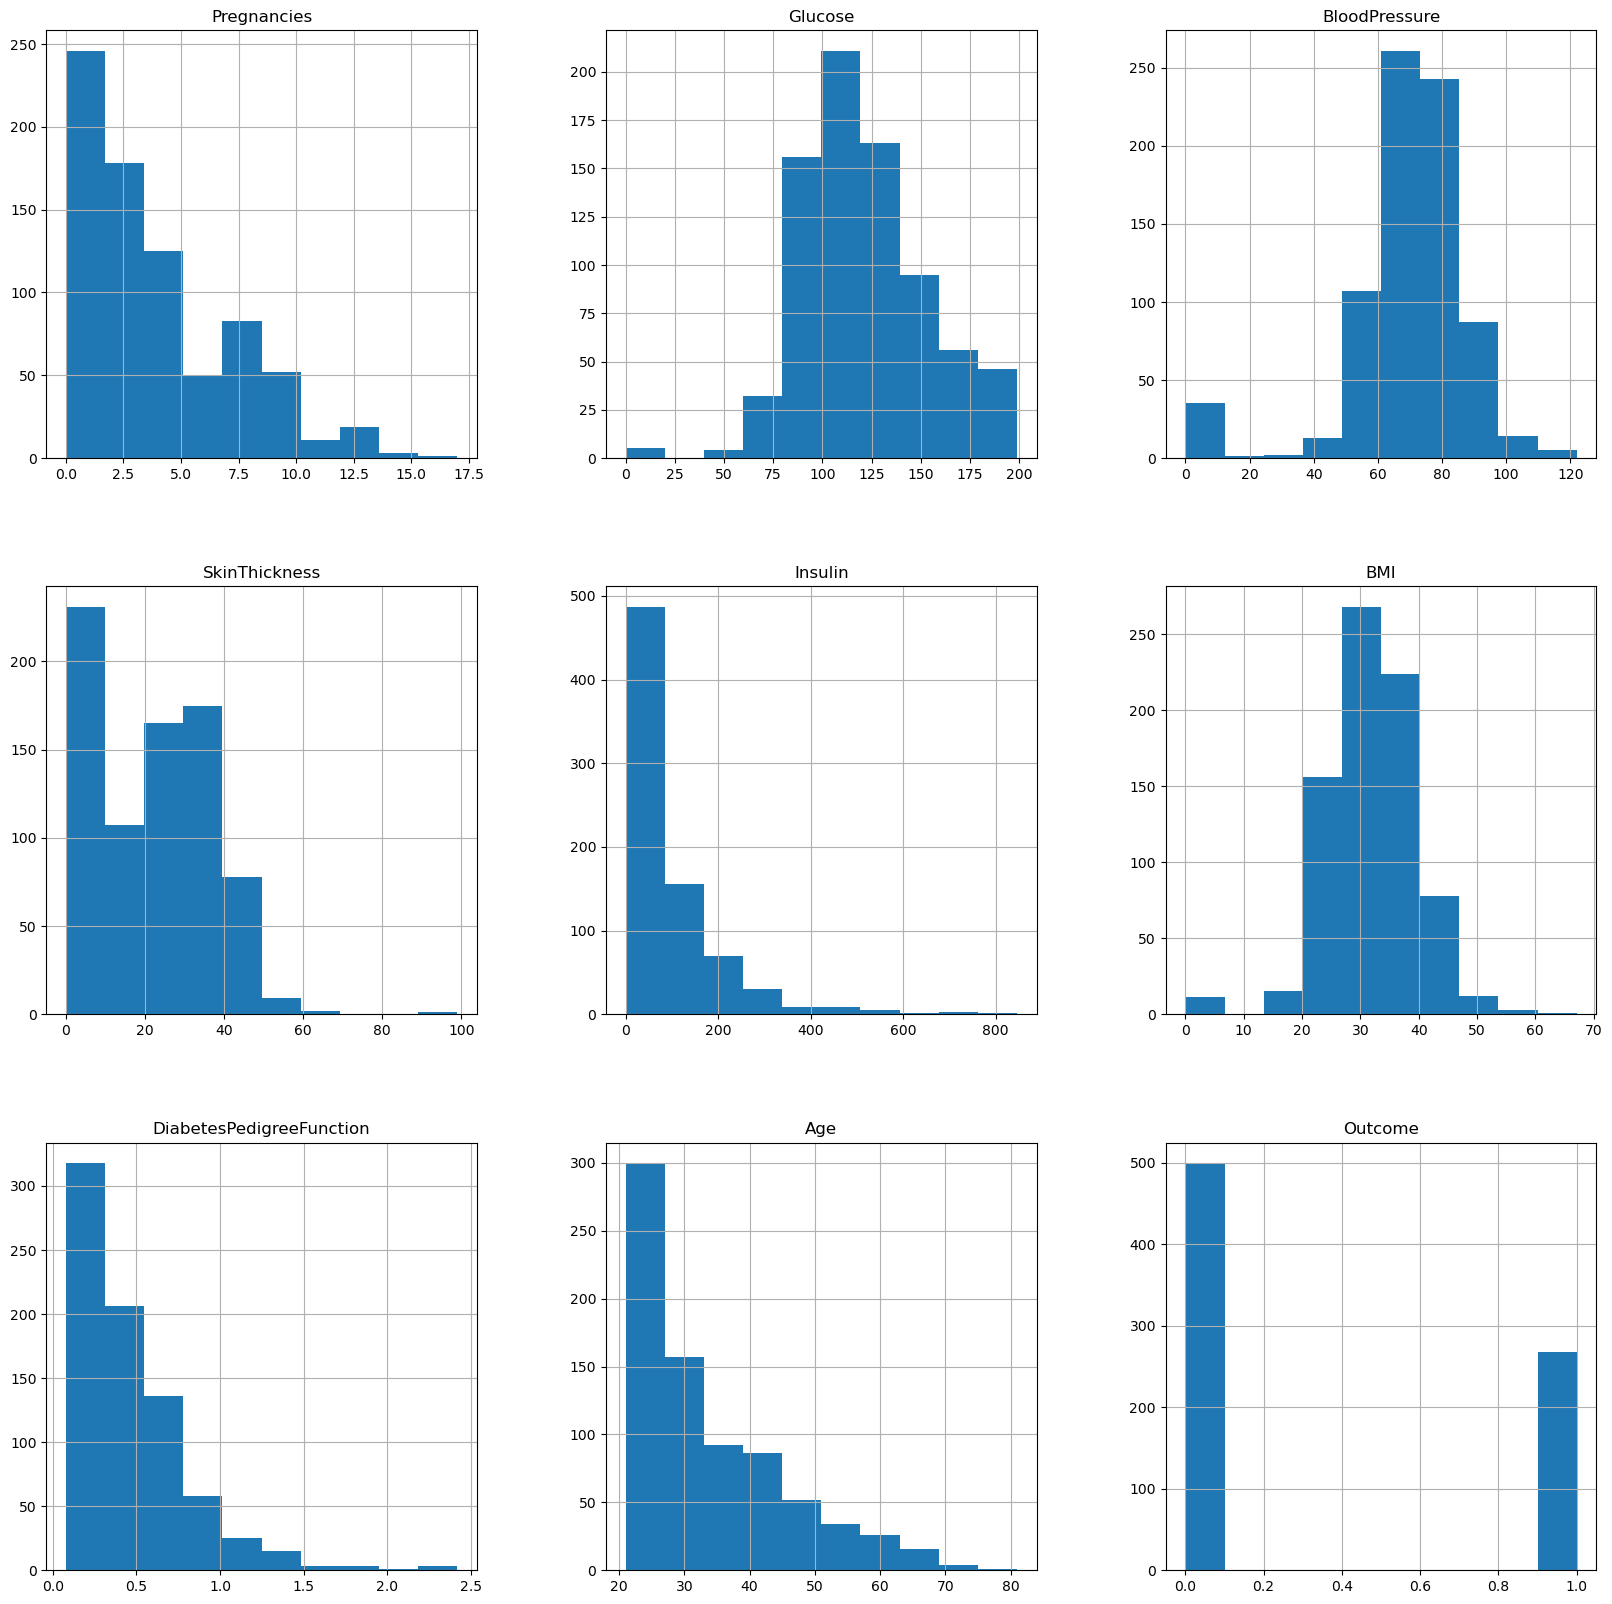

In [6]:
df.hist(figsize=(20,20));

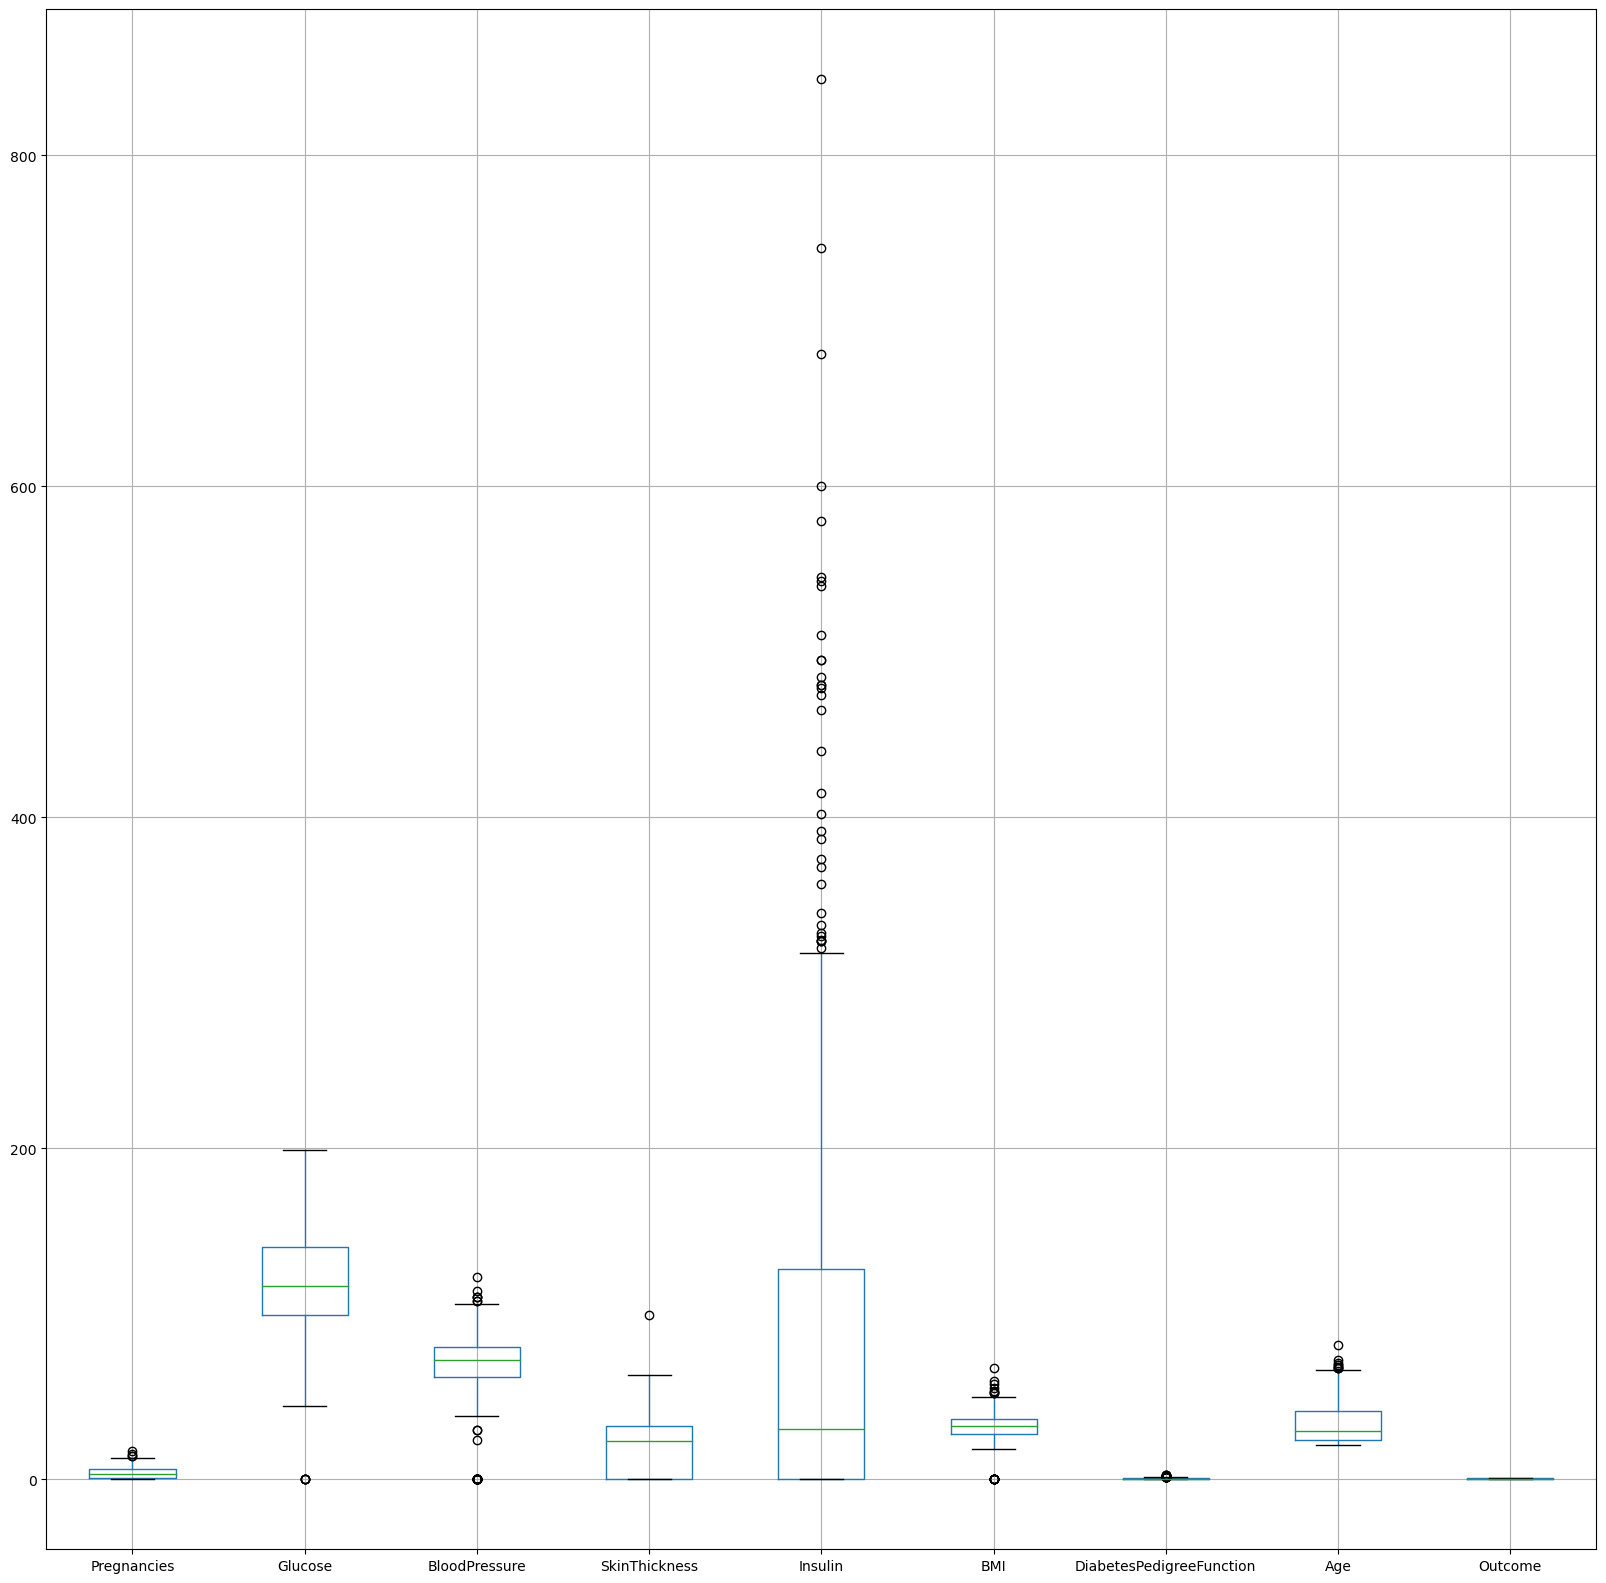

In [7]:
df.boxplot(figsize=(20,20));

### **Observations:**
- `Glucose` has 5 zeros (Nan). Since the outliers make up for <1% of the column, they'll be filled with the **_mean_** of the column.
- Since `BloodPressure` has some outliers, the zeros will be replaced with the **_median_** value of the column.
- For `SkinThickness`, it can be seen from the chart that this column has one outlier. Since it is only one outlier, that row will be dropped and the zeros in the column will be filled with the **_mean_** of the column.
- All zeros in the column `Insulin` will be replaced with the **_median_** value of the column since it contains so many outliers.
- Zeros in the `BMI` column will also be filled with the **_median_** value of that column.

Since all the columns have some outliers, proceed to fill all zeroes with the median values for all columns except `Pregnancies` and `Outcome` column

# Data Cleaning

In [8]:
# Find the only outlier in `SkinThickness` column
df[df['SkinThickness'] > 90]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


In [9]:
# Drop the only outlier in `SkinThickness` column
df.drop([579],inplace = True)

In [10]:
# This method 
def replace_zeros_median(df, columns):
    for col in columns:
        median = df[col].median()
        df[col].replace(0, median,inplace=True)
    return df

In [11]:
def replace_zeros_mean(df, columns):
    for col in columns:
        mean = df[col].mean()
        df[col].replace(0, mean,inplace=True)
    return df

In [12]:
df = replace_zeros_median(df, ['BMI','BloodPressure', 'Insulin'])
df = replace_zeros_mean(df, ['SkinThickness', 'Glucose'])

# Build Model

In [13]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [14]:
# train-test split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(613, 8)
(154, 8)
(613,)
(154,)


In [15]:
# train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state= 42)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(490, 8)
(123, 8)
(490,)
(123,)


### Model 1 (DecisionTreeClassifier)

Training Accuracy Scores: [0.7306122448979592, 0.7346938775510204, 0.7571428571428571]
Validation Accuracy Scores: [0.7642276422764228, 0.7642276422764228, 0.7560975609756098]


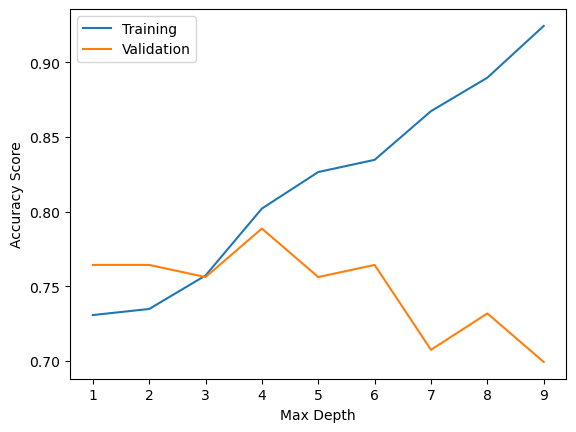

In [16]:
depth_hyperparams = range(1,10,1)
# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    
    # Create model with `max_depth` of `d`
    test_model_dtc = DecisionTreeClassifier(random_state= 42, max_depth = d)
    
    # Fit model to training data
    test_model_dtc.fit(X_train, y_train)
    
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model_dtc.score(X_train, y_train))
    
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(accuracy_score(y_val, test_model_dtc.predict(X_val)))
    
print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams, training_acc, label = "Training")
plt.plot(depth_hyperparams, validation_acc, label = "Validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend();

From the graph, the accuracy score of the validation set stopped improving after a max_depth of 2. Hence, a max depth of 2 will be used for the DecisionTreeClassifier.

In [17]:
# Create model
model_dtc = DecisionTreeClassifier(max_depth= 2, random_state= 42)

# Fit model
model_dtc.fit(X_train, y_train)

# Calculate accuracy score
print(f'Accuracy Score DTC: {round(accuracy_score(y_test, model_dtc.predict(X_test)),4)}')

Accuracy Score DTC: 0.7857


### Model 2 (RandomForestClassifier)

Training Accuracy Scores: [0.689795918367347, 0.7448979591836735, 0.7857142857142857]
Validation Accuracy Scores: [0.6829268292682927, 0.7804878048780488, 0.7886178861788617]


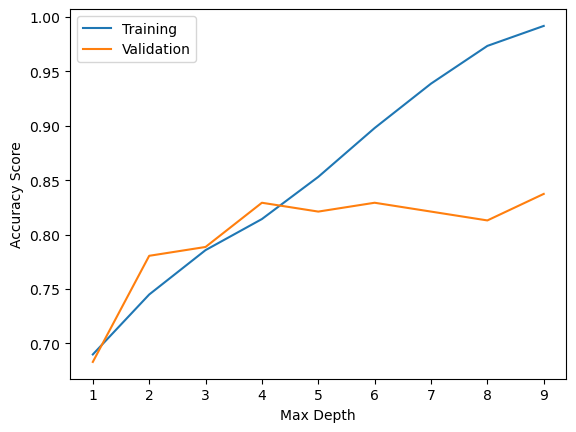

In [18]:
depth_hyperparams = range(1,10,1)
# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    
    # Create model with `max_depth` of `d`
    test_model_rfc = RandomForestClassifier(random_state= 42, max_depth = d)
    
    # Fit model to training data
    test_model_rfc.fit(X_train, y_train)
    
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model_rfc.score(X_train, y_train))
    
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(accuracy_score(y_val, test_model_rfc.predict(X_val)))
    
print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams, training_acc, label = "Training")
plt.plot(depth_hyperparams, validation_acc, label = "Validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend();

From the graph, the accuracy score of the validation set stopped improving after a max_depth of 2. Hence, a max depth of 2 will be used for the RandomForestClassifier.

In [19]:
# Create model
model_rfc = RandomForestClassifier(max_depth=4, random_state= 42, n_jobs=-1)

# Fit model
model_rfc.fit(X_train, y_train)

# Calculate accuracy score
print(f'Accuracy Score RFC: {round(accuracy_score(y_test, model_rfc.predict(X_test)),4)}')

Accuracy Score RFC: 0.8052


### Model 3 (GradientBoostingClassifier)

Training Accuracy Scores: [0.7918367346938775, 0.8816326530612245, 0.9204081632653062]
Validation Accuracy Scores: [0.8292682926829268, 0.8130081300813008, 0.7886178861788617]


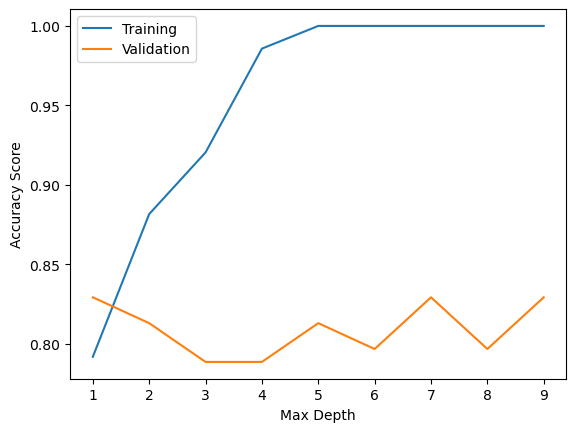

In [20]:
depth_hyperparams = range(1,10,1)
# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    
    # Create model with `max_depth` of `d`
    test_model_gbc = GradientBoostingClassifier(random_state= 42, max_depth = d)
    
    # Fit model to training data
    test_model_gbc.fit(X_train, y_train)
    
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model_gbc.score(X_train, y_train))
    
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(accuracy_score(y_val, test_model_gbc.predict(X_val)))
    
print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams, training_acc, label = "Training")
plt.plot(depth_hyperparams, validation_acc, label = "Validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend();

From the graph, the accuracy score of the validation set stopped improving after a max_depth of 1. Therefore, a max depth of 1 will be used for the GradientBoostingClassifier.

In [21]:
# Create model
model_gbc = GradientBoostingClassifier(random_state=42,max_depth=1)

# Fit model
model_gbc.fit(X_train, y_train)

# Calculate accuracy score
print(f'Accuracy Score GBC: {round(accuracy_score(y_test, model_gbc.predict(X_test)),4)}')

Accuracy Score GBC: 0.7857


---
### Accuracy Score Table

| DecisionTreeClassifier | RandomForestClassifier | GradientBoostingClassifier |
| ---------------------- | ---------------------- | -------------------------- |
| 0.7857 | 0.8052 |0.7857|

---

## Confusion Matrices

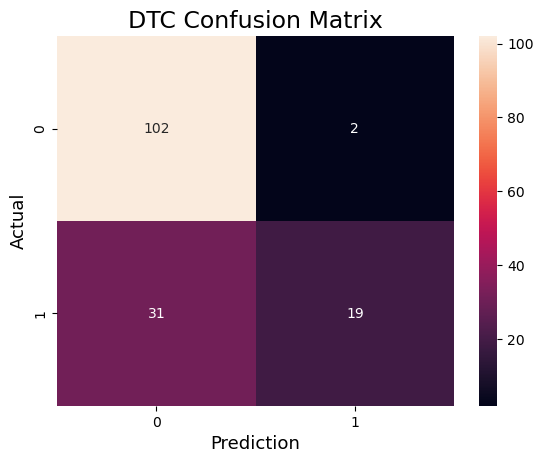

In [22]:
# DTC
cm_DTC = confusion_matrix(y_test, model_dtc.predict(X_test))

sns.heatmap(
    cm_DTC,
    annot = True,
    fmt = 'g',
)
plt.ylabel('Actual', fontsize = 13)
plt.xlabel('Prediction', fontsize = 13)
plt.title('DTC Confusion Matrix', fontsize = 17);

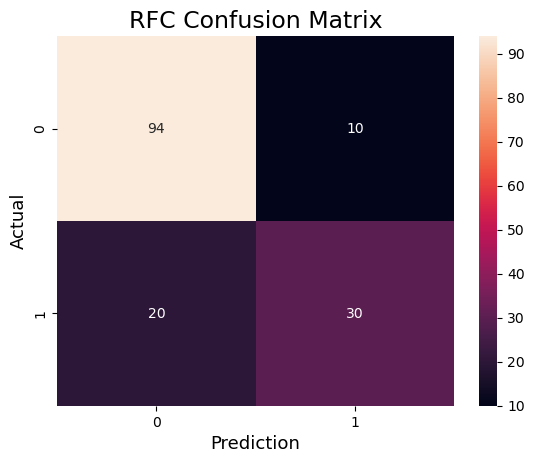

In [23]:
# RFC
cm_RFC = confusion_matrix(y_test, model_rfc.predict(X_test))

sns.heatmap(
    cm_RFC,
    annot = True,
    fmt = 'g',
)
plt.ylabel('Actual', fontsize = 13)
plt.xlabel('Prediction', fontsize = 13)
plt.title('RFC Confusion Matrix', fontsize = 17);

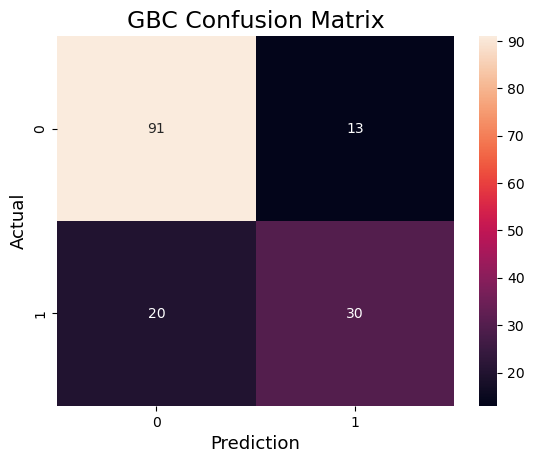

In [24]:
# GBC
cm_GBC = confusion_matrix(y_test, model_gbc.predict(X_test))

sns.heatmap(
    cm_GBC,
    annot = True,
    fmt = 'g',
)
plt.ylabel('Actual', fontsize = 13)
plt.xlabel('Prediction', fontsize = 13)
plt.title('GBC Confusion Matrix', fontsize = 17);

### Observations:
- The `DecisionTreeClassifier` yields the highest number of false negatives which is potentially dangerous in the medical field. 
- The `RandomForestClassifier` and the `GradientBoostingClassifier` both have relatively lower false positives.
- The `RandomForestClassifier` is the best performing model not only by accuracy score but also by the fact that it minimizes false positives and false negatives the most among the 3 models.

## Feature Importances

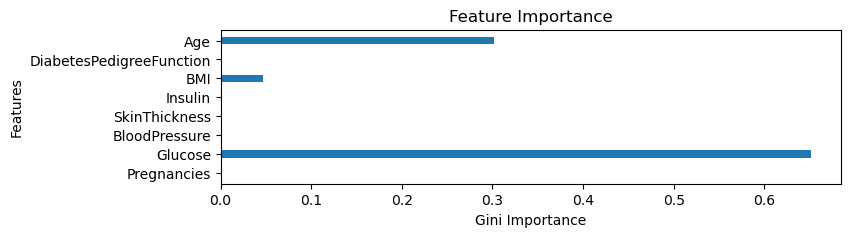

In [25]:
# Feature importance DecisionTreeClassifier
fig, ax = plt.subplots(figsize = (8, 2))
plt.barh(model_dtc.feature_names_in_, model_dtc.feature_importances_, height = 0.4, figure = fig)
plt.ylabel("Features")
plt.xlabel("Gini Importance")
plt.title("Feature Importance");

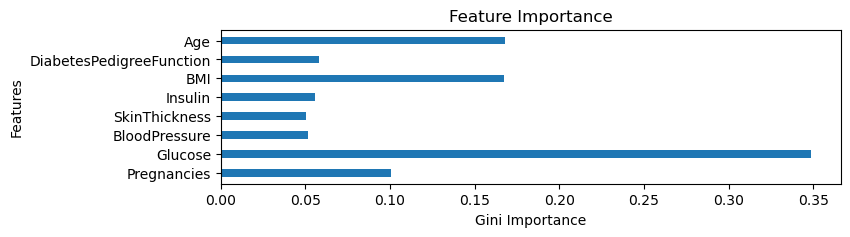

In [26]:
# Feature importance RandomForestClassifier
fig, ax = plt.subplots(figsize = (8, 2))
plt.barh(model_rfc.feature_names_in_, model_rfc.feature_importances_, height = 0.4, figure = fig)
plt.ylabel("Features")
plt.xlabel("Gini Importance")
plt.title("Feature Importance");

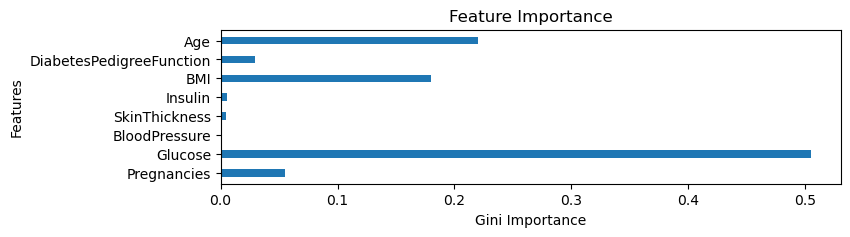

In [27]:
# Feature importance GradientBoostingClassifier
fig, ax = plt.subplots(figsize = (8, 2))
plt.barh(model_gbc.feature_names_in_, model_gbc.feature_importances_, height = 0.4, figure = fig)
plt.ylabel("Features")
plt.xlabel("Gini Importance")
plt.title("Feature Importance");

# Further Exploration

Considering that the DecisionTreeClassifier model only made use of `Age`, `BMI` and `Glucose`, try building the model using only those 3 variables.

In [28]:
X_few = X[['Age','BMI','Glucose']]
X_few.head()

,Age,BMI,Glucose
0,50,33.6,148.0
1,31,26.6,85.0
2,32,23.3,183.0
3,21,28.1,89.0
4,33,43.1,137.0


In [29]:
y_few = y.copy()
y_few.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [30]:
X_few_train, X_few_test, y_few_train, y_few_test = train_test_split(X_few, y_few, test_size=0.2, random_state= 42)

print(X_few_train.shape)
print(X_few_test.shape)
print(y_few_train.shape)
print(y_few_test.shape)

(613, 3)
(154, 3)
(613,)
(154,)


In [31]:
model_dtc_2 = DecisionTreeClassifier(max_depth=2)

model_dtc_2.fit(X_few_train,y_few_train)

DecisionTreeClassifier(max_depth=2)

In [32]:
print(f'Accuracy Score DTC_2: {round(accuracy_score(y_few_test,model_dtc_2.predict(X_few_test)),4)}')


Accuracy Score DTC_2: 0.8182


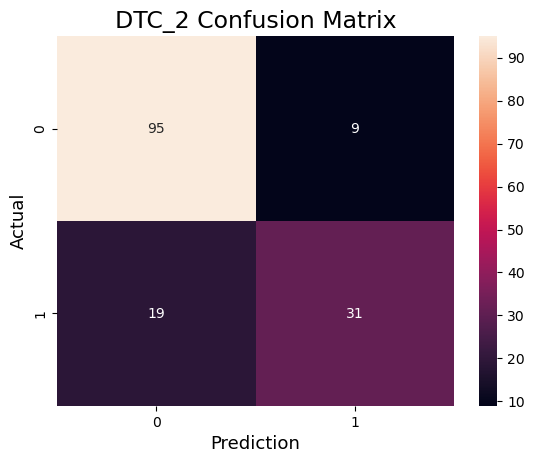

In [33]:
# DTC
cm_DTC_2 = confusion_matrix(y_few_test,model_dtc_2.predict(X_few_test))

sns.heatmap(
    cm_DTC_2,
    annot = True,
    fmt = 'g',
)
plt.ylabel('Actual', fontsize = 13)
plt.xlabel('Prediction', fontsize = 13)
plt.title('DTC_2 Confusion Matrix', fontsize = 17);

### Conclusion:
- Here, the `DecisionTreeClassifier` outperforms both `RandomForestClassifier` and `GradientBoostingClassifier` with an accuracy score of `0.8182` and a decreased false positives and negatives when compared to the aforementioned models